In [10]:
import urllib.request
from inscriptis import get_text
from collections import Counter 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def scraping(url):

    html = urllib.request.urlopen(url).read().decode('utf-8') #ouverture de la requete HTTP 
    text = get_text(html) #création de la chaine de caractère à partir de laquelle on extrait les mots
    cnt = Counter() #initialisation du Counter qui contiendra les mots
    exceptions = ['le', 'la', 'les', 'un', 'une', 'des', 'du', 'de', 'au', 'aux', 'o', 'qui', 'que', 'quoi', 'et', 'pour', '*', '+', 'vous', 'notre','nos', '?', 'en', ':', 'vos', 'votre', 'sur', 'à', 'avec', 'dans', 'nous', 'Nous', 'leur', 'Vous', 'y', 'Comment', 'En', 'plus', 'Nos', 'ici', 'the', 'a', 'to', '+']
    words = text.split()
    print(type(words))
    cnt = Counter(words)
    for i in exceptions:
        for ic in cnt:
            if ic == i:
                cnt[ic] = 0
    
    return cnt.most_common(10)





In [11]:
scraping('https://www.alcuin.com')

<class 'list'>


[('formation', 33),
 ('gestion', 12),
 ('logiciels', 10),
 ('développement', 10),
 ('RH', 9),
 ('compétences', 8),
 ('alcuin', 7),
 ('Téléchargez', 7),
 ('solution', 6),
 ('Découvrez', 6)]

In [3]:
import pandas as pd

dataframe = pd.read_csv('sourcing_dataset.csv', sep=',', encoding='latin-1')
dataframe.shape

(223, 7)

In [4]:
dataframe

,cluster,name,cleaned_saas_url,tf[14]_url,tf[10]_url,tf[14]_g2,tf[10]_g2
0,Carrière/Objectifs,ClearCompany,http://www.clearcompany.com,2.275658,1.994172,2.450077,2.289450
1,Carrière/Objectifs,Heartpace,https://heartpace.com,1.121706,0.704209,0.966469,0.000000
2,Carrière/Objectifs,Outplacement,https://www.randstadrisesmart.com/talent-mobil...,0.000000,0.000000,0.992593,0.584456
3,Carrière/Objectifs,Patheer,https://patheer.com/,1.368645,0.921495,0.874239,0.874239
4,Carrière/Objectifs,PathSavvy,https://pathsavvy.org/,3.006998,2.393814,1.122325,0.374674
5,Carrière/Objectifs,PlanDo,https://www.plando.com,0.448493,0.575906,0.000000,0.000000
6,Carrière/Objectifs,Promo Grid,http://www.promogrid.funkynetsoftware.com.s3-w...,0.928905,1.110464,0.000000,0.000000
7,Carrière/Objectifs,Trakstar,https://www.trakstar.com,1.118014,0.000000,0.974689,0.877252
8,Carrière/Objectifs,TriNet,https://www.trinet.com,1.692825,0.830091,0.821213,0.391497
9,Carrière/Objectifs,WebHR,https://webhr.co,1.442801,0.606621,0.822572,0.365397


In [6]:
dataframe['cluster'].value_counts()

Sourcing               143
Procure to Pay          29
Off-boarding            23
Category Management     17
Carrière/Objectifs      11
Name: cluster, dtype: int64

In [8]:
dataframe.dtypes

cluster              object
name                 object
cleaned_saas_url     object
tf[14]_url          float64
tf[10]_url          float64
tf[14]_g2           float64
tf[10]_g2           float64
dtype: object

In [11]:
missing = dataframe.isnull().sum().sort_values(ascending=False)
missing

tf[10]_g2           0
tf[14]_g2           0
tf[10]_url          0
tf[14]_url          0
cleaned_saas_url    0
name                0
cluster             0
dtype: int64

In [14]:
def num_distrib(df, feature, title):
  """
  Function that will allow the user to plot a histogram based on continuous data,
  this will consequently display the distribution of a data.
  
  Parameters:
    - df : DataFrame that contains the feature to analyze.
    - feature : The variable that we want to analyze.
    - title : The title we want to give to the graph.
  """
  
  plt.figure(figsize=(13,8))
  sns.set(palette='pastel', font_scale=1)
  sns.distplot(df[feature], kde=False)
  plt.xlabel(feature)
  plt.ylabel('count')
  plt.title(title)
  plt.show()
  

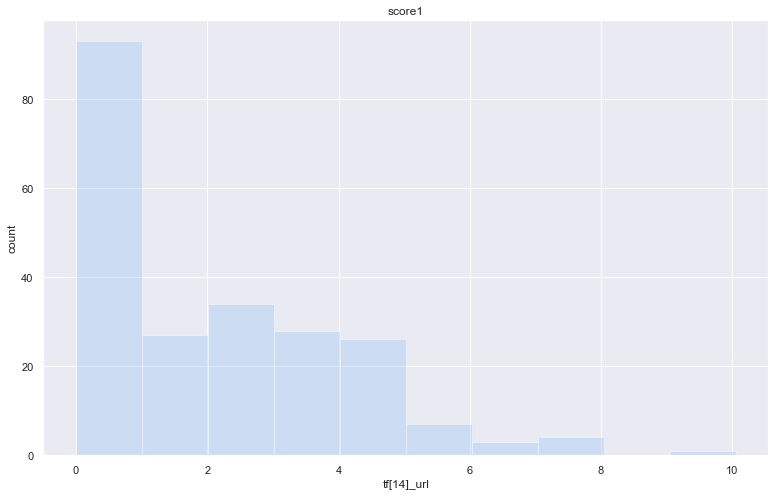

In [20]:
num_distrib(dataframe, 'tf[14]_url', 'tf[14]_url')

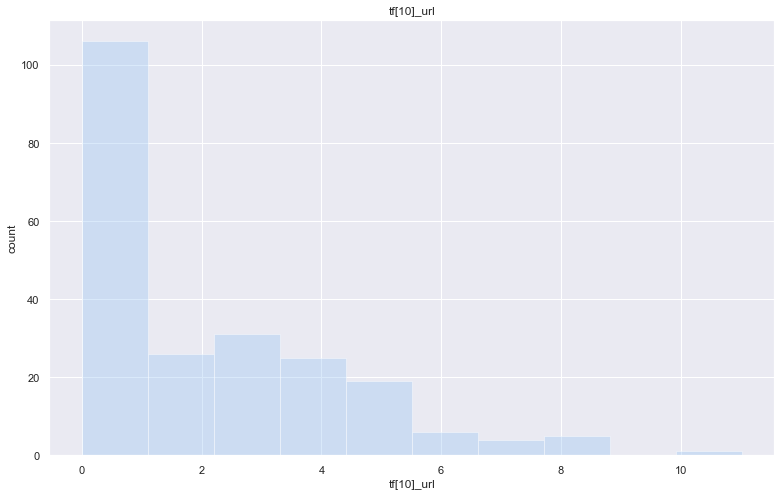

In [21]:
num_distrib(dataframe, 'tf[10]_url', 'tf[10]_url')

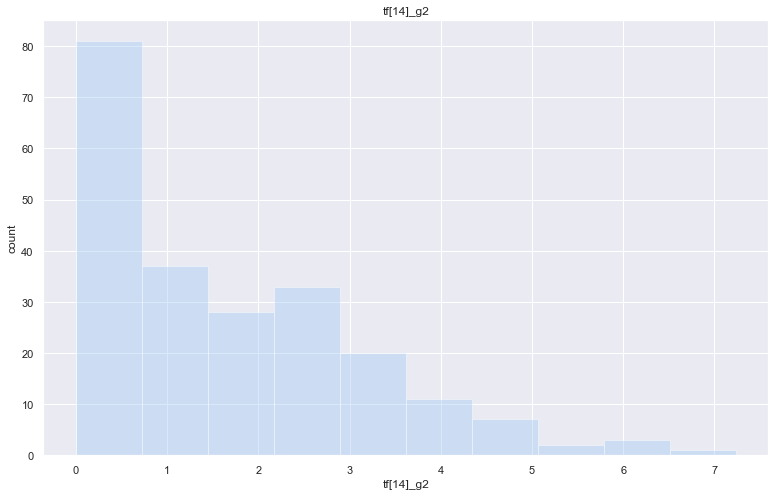

In [22]:
num_distrib(dataframe, 'tf[14]_g2', 'tf[14]_g2')

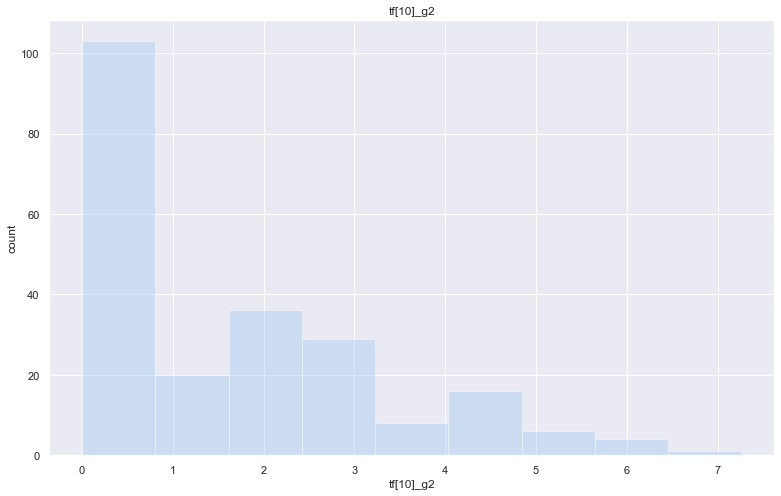

In [23]:
num_distrib(dataframe, 'tf[10]_g2', 'tf[10]_g2')

In [30]:
def agg_avg(df, feat_agg):
    """ Function that aggregates the given dataset by the given feature
        - df: dataset you want to aggregate
        - feat_agg: the feature you want to aggregate the dataset by  """
    df_agg = (df.groupby([feat_agg])
              .mean())
    df_reset_index = df_agg
    df_reset_index.reset_index(level=0, inplace=True)
    return df_reset_index

In [31]:
agg_avg(dataframe, 'cluster')

,cluster,tf[14]_url,tf[10]_url,tf[14]_g2,tf[10]_g2
0,Carrière/Objectifs,1.369993,0.926740,0.911986,0.587160
1,Category Management,0.161230,0.110692,0.094512,0.015353
2,Off-boarding,0.969323,0.626457,0.799164,0.407478
3,Procure to Pay,0.327791,0.197131,0.191264,0.049500
4,Sourcing,2.905518,3.018134,2.304154,2.335501


In [48]:
df_carriere = dataframe.loc[dataframe['cluster'] == 'Carrière/Objectifs']
df_carriere.describe()

,tf[14]_url,tf[10]_url,tf[14]_g2,tf[10]_g2
count,11.000000,11.000000,11.000000,11.000000
mean,1.369993,0.926740,0.911986,0.587160
std,0.821147,0.731073,0.641375,0.651490
min,0.000000,0.000000,0.000000,0.000000
25%,1.023460,0.591263,0.821893,0.182698
50%,1.368645,0.830091,0.966469,0.391497
75%,1.679352,1.083916,1.000129,0.788020
max,3.006998,2.393814,2.450077,2.289450


In [49]:
df_manage = dataframe.loc[dataframe['cluster'] == 'Category Management']
df_manage.describe()

,tf[14]_url,tf[10]_url,tf[14]_g2,tf[10]_g2
count,17.000000,17.000000,17.000000,17.000000
mean,0.161230,0.110692,0.094512,0.015353
std,0.222756,0.227745,0.154277,0.063301
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.266752,0.000000,0.219238,0.000000
max,0.577133,0.671137,0.387537,0.260998


In [50]:
df_board = dataframe.loc[dataframe['cluster'] == 'Off-boarding']
df_board.describe()

,tf[14]_url,tf[10]_url,tf[14]_g2,tf[10]_g2
count,23.000000,23.000000,23.000000,23.000000
mean,0.969323,0.626457,0.799164,0.407478
std,0.936210,0.934234,0.668922,0.715382
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.405599,0.000000
50%,0.715894,0.000000,0.654705,0.000000
75%,1.556151,0.889851,1.030365,0.425766
max,3.225080,3.444733,2.339614,2.077554


In [51]:
df_pay = dataframe.loc[dataframe['cluster'] == 'Procure to Pay']
df_pay.describe()

,tf[14]_url,tf[10]_url,tf[14]_g2,tf[10]_g2
count,29.000000,29.000000,29.000000,29.000000
mean,0.327791,0.197131,0.191264,0.049500
std,0.314659,0.292051,0.251936,0.150676
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.299151,0.000000,0.000000,0.000000
75%,0.534976,0.418505,0.357726,0.000000
max,1.237689,0.845237,0.664349,0.587245


In [52]:
df_sourcing = dataframe.loc[dataframe['cluster'] == 'Sourcing']
df_sourcing.describe()

,tf[14]_url,tf[10]_url,tf[14]_g2,tf[10]_g2
count,143.000000,143.000000,143.000000,143.000000
mean,2.905518,3.018134,2.304154,2.335501
std,2.008241,2.271822,1.500306,1.668070
min,0.000000,0.000000,0.000000,0.000000
25%,1.387523,1.261682,1.222185,1.035477
50%,2.960658,2.913356,2.249216,2.099877
75%,4.126068,4.392446,3.260560,3.221244
max,10.049006,11.017585,7.230807,7.262977


In [58]:
Bin = ['Carrière/Objectifs', 'Procure to Pay', 'Category Management', 'Off-boarding']
for i in Bin:
    dataframe['cluster'] = dataframe['cluster'].replace(i, 0)

dataframe['cluster'] = dataframe['cluster'].replace('Sourcing', 1)
clean_df = dataframe.drop(['name', 'cleaned_saas_url'], axis = 1)
clean_df

,cluster,tf[14]_url,tf[10]_url,tf[14]_g2,tf[10]_g2
0,0,2.275658,1.994172,2.450077,2.289450
1,0,1.121706,0.704209,0.966469,0.000000
2,0,0.000000,0.000000,0.992593,0.584456
3,0,1.368645,0.921495,0.874239,0.874239
4,0,3.006998,2.393814,1.122325,0.374674
5,0,0.448493,0.575906,0.000000,0.000000
6,0,0.928905,1.110464,0.000000,0.000000
7,0,1.118014,0.000000,0.974689,0.877252
8,0,1.692825,0.830091,0.821213,0.391497
9,0,1.442801,0.606621,0.822572,0.365397


In [59]:
"""Let's define our features and target"""
features = ['tf[14]_url', 'tf[10]_url', 'tf[14]_g2', 'tf[10]_g2']
X = clean_df[features]
y = clean_df['cluster']

In [60]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(200, 4)
(200,)
(23, 4)
(23,)


In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, classification_report, roc_curve, precision_score, recall_score, confusion_matrix

rf = RandomForestClassifier() 
rf_score = cross_val_score(rf, X_train, y_train, cv=5, verbose=5)
print('Score on Validation Set : {}'.format(rf_score.mean()))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  ................................................................
[CV] .................................... , score=0.775, total=   0.1s
[CV]  ................................................................
[CV] .................................... , score=0.925, total=   0.1s
[CV]  ................................................................
[CV] .................................... , score=0.900, total=   0.1s
[CV]  ................................................................
[CV] .................................... , score=0.900, total=   0.1s
[CV]  ................................................................
[CV] .................................... , score=0.925, total=   0.1s
Score on Validation Set : 0.885


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished


In [62]:
# accuracy on test set
rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_test)
print(classification_report(y_test, rf_predictions))

              precision    recall  f1-score   support

           0       0.86      0.75      0.80         8
           1       0.88      0.93      0.90        15

    accuracy                           0.87        23
   macro avg       0.87      0.84      0.85        23
weighted avg       0.87      0.87      0.87        23



In [70]:
param_to_opti = {
    'n_estimators' : [6, 11, 26, 51],
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [2, 4, 8, 16, 32],
    'max_features' : ['auto', 'log2', 'sqrt'],
}

rf_opti = RandomForestClassifier()
rf_opti_model = GridSearchCV(estimator=rf_opti, scoring='f1_macro', param_grid=param_to_opti, cv=5)
rf_opti_model.fit(X_train, y_train)
print('Random Forest best hyperparameters : {}'.format(rf_opti_model.best_params_))

Random Forest best hyperparameters : {'criterion': 'gini', 'max_depth': 2, 'max_features': 'auto', 'n_estimators': 11}


In [71]:
rf_2 = RandomForestClassifier(n_estimators=11, criterion='gini', max_depth=2, max_features='auto', n_jobs = -1)
rf_score_2 = cross_val_score(rf_2, X_train, y_train, cv=5, verbose=5)
print('Score on Validation Set : {}'.format(rf_score_2.mean()))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] .................................... , score=0.750, total=   1.2s
[CV]  ................................................................
[CV] .................................... , score=0.925, total=   0.1s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.2s remaining:    0.0s


[CV] .................................... , score=0.900, total=   0.1s
[CV]  ................................................................
[CV] .................................... , score=0.950, total=   0.1s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.5s remaining:    0.0s


[CV] .................................... , score=0.950, total=   0.1s
Score on Validation Set : 0.8950000000000001


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.6s finished


In [67]:
def make_pred(tf_14_url, tf_10_url, tf_14_g2, tf_10_g2):
    X_new = [tf_14_url, tf_10_url, tf_14_g2, tf_10_g2]
    print(rf_2.predict([X_new]))
    
rf_2.fit(X, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=4, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=11, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [69]:
make_pred(0, 0, 0, 0
         )

[0]


In [1]:
pip freeze


affine==2.3.0
alabaster==0.7.12
anaconda-client==1.7.2
anaconda-navigator==1.9.7
anaconda-project==0.8.3
asn1crypto==0.24.0
astroid==2.2.5
astropy==3.2.1
atomicwrites==1.3.0
attrs==19.1.0
Babel==2.7.0
backcall==0.1.0
backports.functools-lru-cache==1.5
backports.os==0.1.1
backports.shutil-get-terminal-size==1.0.0
backports.tempfile==1.0
backports.weakref==1.0.post1
beautifulsoup4==4.7.1
bitarray==0.9.3
bkcharts==0.2
bleach==3.1.0
bokeh==1.2.0
boto==2.49.0
Bottleneck==1.2.1
bs4==0.0.1
certifi==2019.11.28
cffi==1.12.3
chardet==3.0.4
Click==7.0
click-plugins==1.1.1
cligj==0.5.0
cloudpickle==1.2.1
clyent==1.2.2
colorama==0.4.1
comtypes==1.1.7
conda==4.8.1
conda-build==3.18.8
conda-package-handling==1.3.11
conda-verify==3.4.2
contextlib2==0.5.5
cryptography==2.7
cycler==0.10.0
Cython==0.29.12
cytoolz==0.10.0
dask==2.1.0
decorator==4.4.0
defusedxml==0.6.0
distributed==2.1.0
docutils==0.14
entrypoints==0.3
et-xmlfile==1.0.1
fastcache==1.1.0
filelock==3.0.12
findspark==1.3.0
Flask==1.1.1
future

In [2]:
pip install collections

Note: you may need to restart the kernel to use updated packages.


  ERROR: Could not find a version that satisfies the requirement collections (from versions: none)
ERROR: No matching distribution found for collections
